#**Black Friday Sale Prediction**

#**1. Exploratory Data Analysis**

1. Variable Identification
2. Univariate Analysis
3. Bi/Multivariate Analysis
4. Outlier Detection
5. Missing Value Treatment

##**Load Data and Libraries**

In [ ]:
  from google.colab import drive
  import os

  drive.mount('/content/drive/', force_remount=True)
  os.chdir('/content/drive/My Drive/CA683 Assignment Data Analytics and Data Mining/black_friday_dataset/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sale_df = train

##**1.1. Variable Identification**

The Black Friday Sale Dataset Consist of two files (train.csv and test.csv).

The train dataset includes 11 attributes (*User_ID, Product_ID, Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status, Product_Category_1, Product_Category_2, Product_Category_3, Purchase*) with both numirical and categorical data of total 550068 rows of values.

In [ ]:
sale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


The dataset consist of different data types which can be changed if required.

Most column attributes has non null value except for two attributes (*Product_Category_2 and Product_Category_3*). We will deal with the null values in the Missing Values Treatment Section.

In [ ]:
sale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


The test.csv dataset does not include purchase information which is the target variable we want to predict. So we have decided to work with train dataset which is big enough for splitting it into training and testing sets.

In [ ]:
sale_df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [ ]:
sale_df.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


**Type of Variable:**

**Categorical Variable:** User_ID, Product_ID, Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status, Product_Category_1	Product_Category_2	Product_Category_3.


**Continuous Variable:** Purchase

##**1.2. Univariate Analysis**

###**1.2.1. User_ID**

In [ ]:
total_unique_user_id = len(sale_df['User_ID'].unique())
print('Total Unique User ID:', total_unique_user_id)

Total Unique User ID: 5891


###**1.2.2. Product_ID**

In [ ]:
total_unique_product_id = len(sale_df['Product_ID'].unique())
print('Total Unique Product ID:', total_unique_product_id)

Total Unique Product ID: 3631


###**1.2.3. Gender**

Text(0.0, 1.0, 'Gender Count')

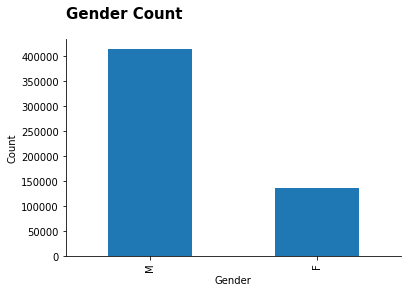

In [ ]:
gender_barplot = sale_df['Gender'].value_counts().plot(kind='bar')
gender_barplot.set_xlabel('Gender')
gender_barplot.set_ylabel('Count')
sns.despine()
gender_barplot.set_title('Gender Count', fontsize = 15, pad = 20, loc = 'left', weight = 'bold')

###**1.2.4. Age**

Text(0.0, 1.0, 'AGE')

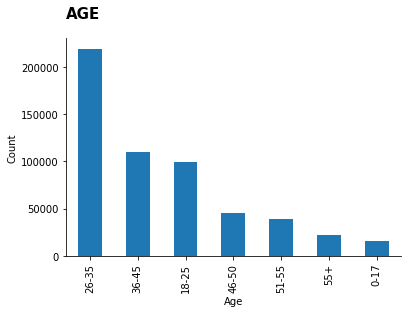

In [ ]:
# sale_df['Age'].value_counts().plot(kind='bar')
age_barplot = sale_df['Age'].value_counts().plot(kind='bar')
age_barplot.set_xlabel('Age')
age_barplot.set_ylabel('Count')
sns.despine()
age_barplot.set_title('AGE', fontsize = 15, pad = 20, loc = 'left', weight = 'bold')

###**1.2.5. Occupation**

Text(0.0, 1.0, 'OCCUPATION')

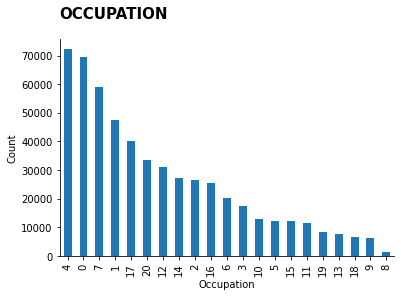

In [ ]:
# sale_df['Occupation'].value_counts().plot(kind='bar')
occupation_barplot = sale_df['Occupation'].value_counts().plot(kind='bar')
occupation_barplot.set_xlabel('Occupation')
occupation_barplot.set_ylabel('Count')
sns.despine()
occupation_barplot.set_title('OCCUPATION', fontsize = 15, pad = 20, loc = 'left', weight = 'bold')

###**1.2.6. City_Category**

Text(0.0, 1.0, 'City_Category')

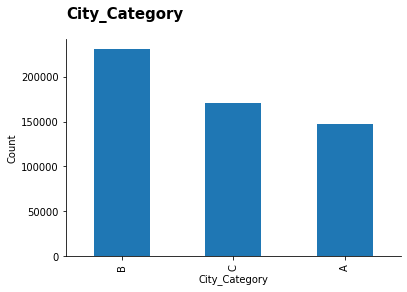

In [ ]:
# sale_df['City_Category'].value_counts().plot(kind='bar')
city_barplot = sale_df['City_Category'].value_counts().plot(kind='bar')
city_barplot.set_xlabel('City_Category')
city_barplot.set_ylabel('Count')
sns.despine()
city_barplot.set_title('City_Category', fontsize = 15, pad = 20, loc = 'left', weight = 'bold')

###**1.2.7. Stay_In_Current_City_Years**

Text(0.0, 1.0, 'Stay_In_Current_City_Years')

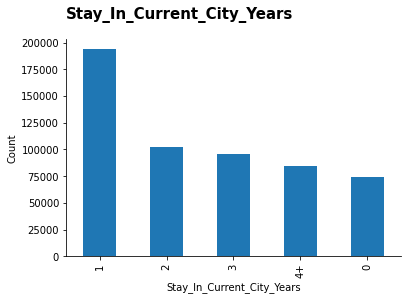

In [ ]:
# sale_df['Stay_In_Current_City_Years'].unique()
stay_barplot = sale_df['Stay_In_Current_City_Years'].value_counts().plot(kind='bar')
stay_barplot.set_xlabel('Stay_In_Current_City_Years')
stay_barplot.set_ylabel('Count')
sns.despine()
stay_barplot.set_title('Stay_In_Current_City_Years', fontsize = 15, pad = 20, loc = 'left', weight = 'bold')

###**1.2.8. Marital_Status**

Text(0.0, 1.0, 'Marital_Status')

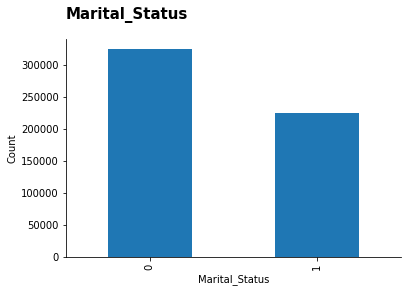

In [ ]:
marital_barplot = sale_df['Marital_Status'].value_counts().plot(kind='bar')
marital_barplot.set_xlabel('Marital_Status')
marital_barplot.set_ylabel('Count')
sns.despine()
marital_barplot.set_title('Marital_Status', fontsize = 15, pad = 20, loc = 'left', weight = 'bold')

###**1.2.9. Product_Category_1**

Text(0.0, 1.0, 'Product_Category_1')

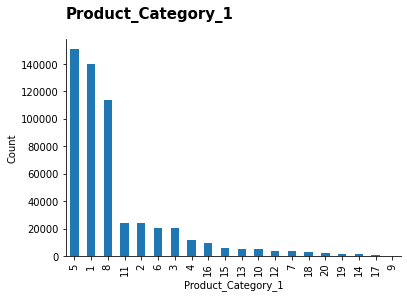

In [ ]:
# sale_df['Product_Category_1'].value_counts().plot(kind='bar')
product1_barplot = sale_df['Product_Category_1'].value_counts().plot(kind='bar')
product1_barplot.set_xlabel('Product_Category_1')
product1_barplot.set_ylabel('Count')
sns.despine()
product1_barplot.set_title('Product_Category_1', fontsize = 15, pad = 20, loc = 'left', weight = 'bold')

###**1.2.10. Product_Category_2**

Text(0.0, 1.0, 'Product_Category_2')

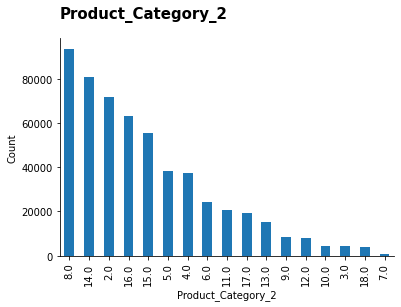

In [ ]:
# sale_df['Product_Category_2'].value_counts().plot(kind='bar')
product2_barplot = sale_df['Product_Category_2'].value_counts().plot(kind='bar')
product2_barplot.set_xlabel('Product_Category_2')
product2_barplot.set_ylabel('Count')
sns.despine()
product2_barplot.set_title('Product_Category_2', fontsize = 15, pad = 20, loc = 'left', weight = 'bold')

###**1.2.11. Product_Category_3**

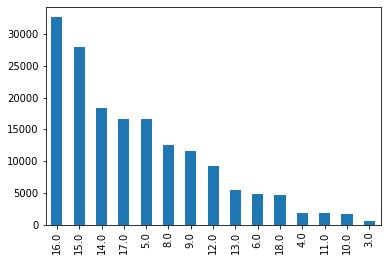

In [ ]:
sale_df['Product_Category_3'].value_counts().plot(kind='bar')

###**1.2.12. Purchase**

The Purchase atribute in the dataset does not have any description on it's unit measure. It is numeric and **continuous** with statistical characteristics (Min: 12, Max: 23961, Mean: 9264, Std: 5023).

There does not seems to be any outlier values in this attribute as purchase values can range from low as 12 to high as 23961.

In [ ]:
sale_df['Purchase'].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

Text(0.0, 1.0, 'Purchase')

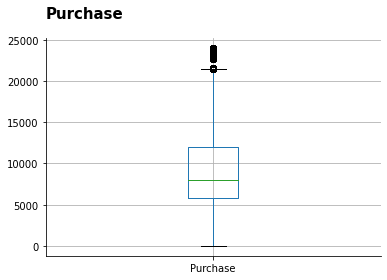

In [ ]:
purchase_boxplot = sale_df.boxplot(column = ['Purchase'], grid = True)
sns.despine()
purchase_boxplot.set_title('Purchase', fontsize = 15, pad = 20, loc = 'left', weight = 'bold')

Text(0.5, 1.0, 'Purchase Distribution')

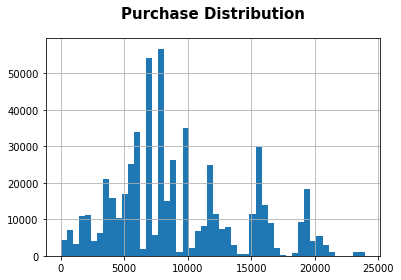

In [ ]:
sale_df.hist('Purchase', bins = 50)
plt.title('Purchase Distribution', fontsize = 15, pad = 20, loc = 'center', weight = 'bold')

In [ ]:
sale_df.loc[train['Product_ID'] == 'P00069042', 'Purchase']

0          8370
825       10715
3314      11037
4224       8009
5864      13346
          ...  
539484    13483
540849    10895
543419    11047
544454    13557
545219    13241
Name: Purchase, Length: 227, dtype: int64

We can observe that the product id corresponds to variable purchase values.

In [ ]:
sale_df[sale_df.index == 0]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370


In [ ]:
sale_df[sale_df.index == 825]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
825,1000149,P00069042,M,26-35,1,B,2,1,3,NaN,NaN,10715


In [ ]:
sale_df[sale_df.index == 545219]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
545219,1005938,P00069042,M,26-35,1,C,1,1,3,NaN,NaN,13241


##**1.3. Bi/Multivariate Analysis**

###**1.3.1 Gender Vs Purchase**

Gender Male seems to be spending more when compared with Female gender.

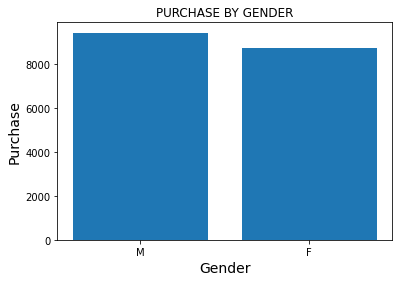

In [ ]:
gender_money_spent = []
genders = sale_df['Gender'].value_counts().index.tolist()
for sex in genders:
    gender_money_spent.append(sale_df[sale_df['Gender'] == sex]['Purchase'].mean())
plt.bar(genders, gender_money_spent )
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Purchase', fontsize=14)
plt.title("PURCHASE BY GENDER")
plt.show()

###**1.3.2 Age Vs Purchase**

Customers in Age range 51-55 seems to be spending more when compared with other age groups. Although there is not much difference among all the age expenditure pattern.

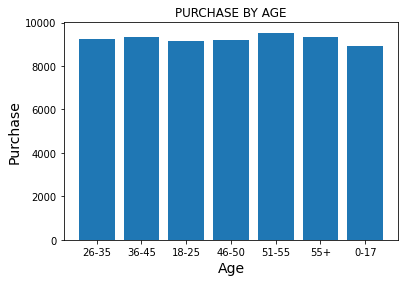

In [ ]:
age_money_spent = []
ages = sale_df['Age'].value_counts().index.tolist()
for age in ages:
    age_money_spent.append(sale_df[sale_df['Age'] == age]['Purchase'].mean())

plt.bar(ages, age_money_spent )
plt.xlabel('Age', fontsize=14)
plt.ylabel('Purchase', fontsize=14)
plt.title("PURCHASE BY AGE")
plt.show()

###**1.3.3 Occupation Vs Purchase**

There is some variation in the mean spending done among 21 Occupation categories, however the differences are not that drastic. Occupation 12 expenditure is the highest and 9 is the lowest.

Text(0.5, 1.0, 'PURCHASE BY OCCUPATION')

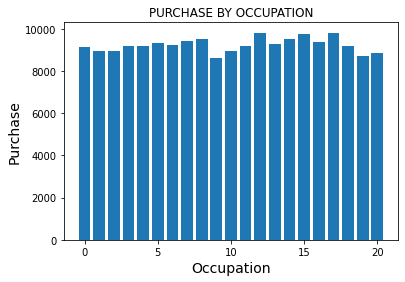

In [ ]:
occupation_spent_money = list()
occupations = sale_df['Occupation'].value_counts().index.tolist()
for oid in occupations:
    occupation_spent_money.append(sale_df[sale_df['Occupation'] == oid]['Purchase'].mean())
plt.bar(occupations, occupation_spent_money)
plt.xlabel('Occupation', fontsize=14)
plt.ylabel('Purchase', fontsize=14)
plt.title("PURCHASE BY OCCUPATION")


###**1.3.4 City_Category Vs Purchase**

Mean spending among City_Category also shows some variations but not huge.

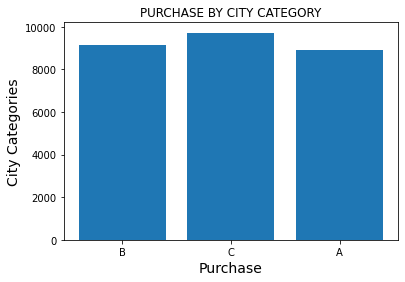

In [ ]:
cities_spent_money = list()
cities = sale_df['City_Category'].value_counts().index.tolist()
for city in cities:
    cities_spent_money.append(sale_df[sale_df['City_Category'] == city]['Purchase'].mean())
plt.bar(cities, cities_spent_money)
plt.xlabel('Purchase', fontsize=14)
plt.ylabel('City Categories', fontsize=14)
plt.title("PURCHASE BY CITY CATEGORY")

plt.show()

###**1.3.5 Stay_In_Current_City_Years Vs Purchase**

Mean spending among customer considering their duration of stay at the specific city (which can be taken as the person being more familier with the city and more frequent visit to retail shop) shows not much difference.

Text(0.5, 1.0, 'PURCHASE BY STAY IN CURRENT CITY')

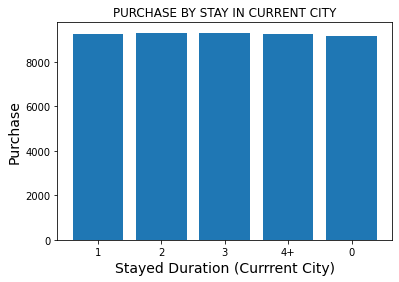

In [ ]:
stay_spent_money = list()
stays = sale_df['Stay_In_Current_City_Years'].value_counts().index.tolist()
for sid in stays:
    stay_spent_money.append(sale_df[sale_df['Stay_In_Current_City_Years'] == sid]['Purchase'].mean())
plt.bar(stays, stay_spent_money)
plt.xlabel('Stayed Duration (Currrent City)', fontsize=14)
plt.ylabel('Purchase', fontsize=14)
plt.title("PURCHASE BY STAY IN CURRENT CITY")


###**1.3.6 Marital_Status Vs Purchase**

Average Marital status (Married or Unmarried) expenditure also has not much difference.

Text(0.5, 1.0, 'PURCHASE BY MARITAL STATUS')

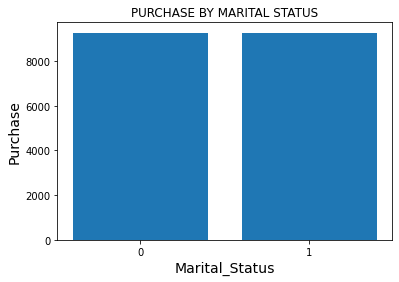

In [ ]:
marital_status_spent_money = list()
status_list = sale_df['Marital_Status'].value_counts().index.tolist()
for status in status_list:
    marital_status_spent_money.append(sale_df[sale_df['Marital_Status'] == status]['Purchase'].mean())
status_list[0]='0'
status_list[1]='1'
plt.bar(status_list, marital_status_spent_money)
plt.xlabel('Marital_Status', fontsize=14)
plt.ylabel('Purchase', fontsize=14)
plt.title("PURCHASE BY MARITAL STATUS")


###**1.3.7 Product_Category_1 Vs Purchase**

Inclusion of some product can be linked to higher expenditure.

Text(0.5, 1.0, 'PURCHASE BY PRODUCT CATEGORY 1')

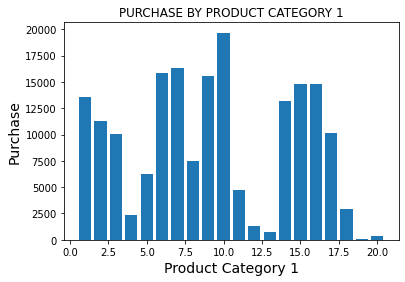

In [ ]:
pc1_spent_money = list()
products = sale_df['Product_Category_1'].value_counts().index.tolist()
for pid in products:
    pc1_spent_money.append(sale_df[sale_df['Product_Category_1'] == pid]['Purchase'].mean())
plt.bar(products, pc1_spent_money)
plt.xlabel('Product Category 1', fontsize=14)
plt.ylabel('Purchase', fontsize=14)
plt.title("PURCHASE BY PRODUCT CATEGORY 1")


###**1.3.8 Product_Category_2 Vs Purchase**

Inclusion of some product can be linked to higher expenditure.

Text(0.5, 1.0, 'PURCHASE BY PRODUCT CATEGORY 2')

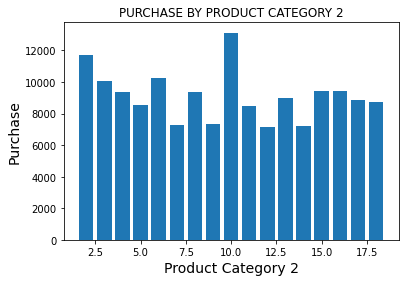

In [ ]:
pc2_spent_money = list()
products = sale_df['Product_Category_2'].value_counts().index.tolist()
for pid in products:
    pc2_spent_money.append(sale_df[sale_df['Product_Category_2'] == pid]['Purchase'].mean())
plt.bar(products, pc2_spent_money)
plt.xlabel('Product Category 2', fontsize=14)
plt.ylabel('Purchase', fontsize=14)
plt.title("PURCHASE BY PRODUCT CATEGORY 2")


###**1.3.9 Product_Category_3 Vs Purchase**

As Product_Category_3 has missing values, we cannot observe similar high variation that we saw in Product_Category_1 and Product_Category_2.

Text(0, 0.5, 'Expenditure')

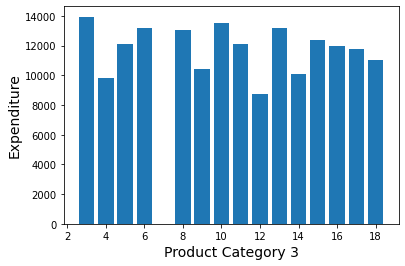

In [ ]:
pc3_spent_money = list()
products = sale_df['Product_Category_3'].value_counts().index.tolist()
for pid in products:
    pc3_spent_money.append(sale_df[sale_df['Product_Category_3'] == pid]['Purchase'].mean())
plt.bar(products, pc3_spent_money)
plt.xlabel('Product Category 3', fontsize=14)
plt.ylabel('Expenditure', fontsize=14)

##**1.4. Outlier Detection**

Presence of Outlier can effect our model performance. After analysing the data in the above section, we have came to conclusion that there is no outlier in this dataset.


There does not seems to be any outlier values in this attribute as purchase values can range from low as 12 to high as 23961.

In [ ]:
sale_df['Purchase'].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

Text(0.0, 1.0, 'Purchase')

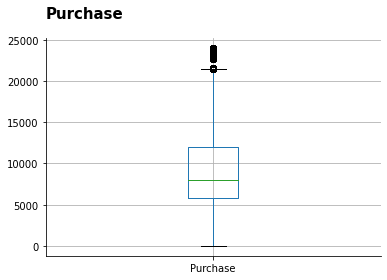

In [ ]:
purchase_boxplot = sale_df.boxplot(column = ['Purchase'], grid = True)
sns.despine()
purchase_boxplot.set_title('Purchase', fontsize = 15, pad = 20, loc = 'left', weight = 'bold')

[array([5823.,   12.]), array([12054., 21399.])]

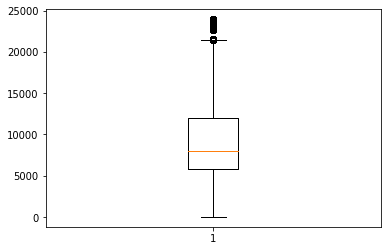

In [ ]:
B = plt.boxplot(sale_df.Purchase)
[item.get_ydata() for item in B['whiskers']]

In [ ]:
[item.get_ydata()[1] for item in B['whiskers']]

[12.0, 21399.0]

In [ ]:
high_purchase_list = []
purchase_list = sale_df['Purchase'].value_counts().index.tolist()
for purchase_amount in purchase_list:
  if purchase_amount > 21399:
    high_purchase_list.append(purchase_amount)
len(high_purchase_list)

1027

We can observe few values outside the maximum (Largest values within 1.5 times interquartile range (IQR) above 75th percentile) in Purchase Box Plot. We check for total number of purchases with values above 23500 which is 419.

In [ ]:
#Plot Normal Distribution Here for Purchase


##**1.5. Missing Value Treatment**

Product_Category_2 and Product_Category_3 has 173638 and 383247 null values respectively out of 550068 rows.

In [ ]:
print('Total number of rows:', len(sale_df))
sale_df.isnull().sum()

Total number of rows: 550068


User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

There in no rows with null values.

In [ ]:
pd.isnull(sale_df).all(axis=1).sum()

0

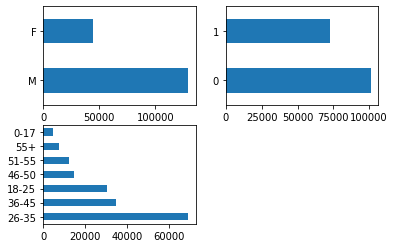

In [ ]:
nan_product2 = sale_df[sale_df['Product_Category_2'].isnull()]
fig = plt.figure()

# Divide the figure into a 1x2 grid, and give me the first section
ax1 = fig.add_subplot(2,2,1)

# Divide the figure into a 1x2 grid, and give me the second section
ax2 = fig.add_subplot(2,2,2)

# Divide the figure into a 1x2 grid, and give me the third section
ax3 = fig.add_subplot(2,2,3)

nan_product2['Gender'].value_counts().plot(kind='barh',  ax=ax1)
nan_product2['Marital_Status'].value_counts().plot(kind='barh', ax = ax2)
nan_product2['Age'].value_counts().plot(kind='barh', ax = ax3)

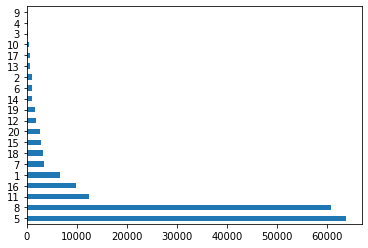

In [ ]:
nan_product2['Product_Category_1'].value_counts().plot(kind='barh')

In [ ]:
prods = sale_df['Product_Category_2'].value_counts().index.tolist()
probs = sale_df['Product_Category_2'].value_counts().tolist()
probs = [p /376430  for p in probs ]
# print(probs,prods)
    
fill_missing = np.random.choice(prods, p = probs, size = len(sale_df))

sale_df['Product_Category_2'].fillna(pd.Series(fill_missing), inplace=True)
sale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


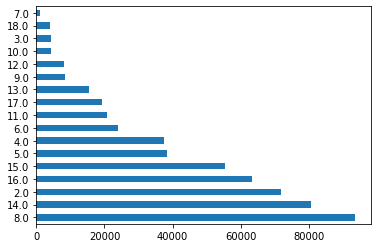

In [ ]:
sale_df['Product_Category_2'].value_counts().plot(kind='barh')

<BarContainer object of 17 artists>

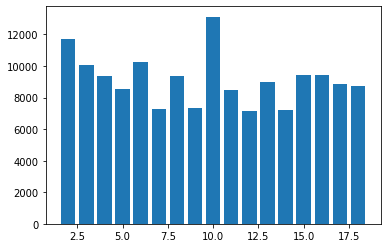

In [ ]:
pc2_spent_money = list()
products = sale_df['Product_Category_2'].value_counts().index.tolist()
for pid in products:
    pc2_spent_money.append(sale_df[sale_df['Product_Category_2'] == pid]['Purchase'].mean())
plt.bar(products, pc2_spent_money)

##**EDA Summary**

* Most of the variables like occupation, Product categories in the dataset are masked with integers and City_Category is masked with alphabets
* Male buyers are more frequent in the dataset than female buyers.
* Age group with most transactions was 26-35.
* Occupation '4' had the most transactions.
* City Category with most transactions was B.
Highest number of purchasers had '1 year stay' in the current city.
* Data set has more singles (Marital status 0) than married people (Marital status 1).

#**2. Data Transformation and OLS**

**Below are from Literature Review:**

**Product_ID** consist of both numerical and character values, we can remove the preceeding 'P' from each values to convert it to numeric.

**Gender** has character values (F,M) which can be converted to (0,1).

**Age** has data in bins (0-17, 26-35) we can take the one number instead of range.

**City_Category** has categorical values (A, B, C), which can be converted to (0,1,2).

**Stay_In_Current_City_Years** has numerical values but one value is 4+, which we can assigned with 4.

In [ ]:
cols = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2']
drop_cols = ['User_ID', 'Product_ID', 'Product_Category_3', 'Purchase']
X1 = pd.get_dummies(sale_df, columns=cols)
X = X1.drop(columns = drop_cols)
X.head(3)

,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,Occupation_8,Occupation_9,Occupation_10,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Marital_Status_0,Marital_Status_1,Product_Category_1_1,Product_Category_1_2,Product_Category_1_3,Product_Category_1_4,Product_Category_1_5,Product_Category_1_6,Product_Category_1_7,Product_Category_1_8,Product_Category_1_9,Product_Category_1_10,Product_Category_1_11,Product_Category_1_12,Product_Category_1_13,Product_Category_1_14,Product_Category_1_15,Product_Category_1_16,Product_Category_1_17,Product_Category_1_18,Product_Category_1_19,Product_Category_1_20,Product_Category_2_2.0,Product_Category_2_3.0,Product_Category_2_4.0,Product_Category_2_5.0,Product_Category_2_6.0,Product_Category_2_7.0,Product_Category_2_8.0,Product_Category_2_9.0,Product_Category_2_10.0,Product_Category_2_11.0,Product_Category_2_12.0,Product_Category_2_13.0,Product_Category_2_14.0,Product_Category_2_15.0,Product_Category_2_16.0,Product_Category_2_17.0,Product_Category_2_18.0
0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y = sale_df['Purchase']

A predictor that has a low p-value (< 0.05) is likely to be a meaningful addition to your model because changes in the predictor's value are related to changes in the response variable. 

If we remove attributes with no significance to the result and both Alaik Information Criterion (AIC) and Bayesian Information Criterion (BIC) increases then it means that the quality of the result has not improved by removal of the attributes.

Since for our dataset, removal of attribute does not decrease the AIC and BIC value thus displays no improvement of the result quality.


##**2.1. Load Dataset**

In [ ]:
  from google.colab import drive
  import os

  drive.mount('/content/drive/', force_remount=True)
  os.chdir('/content/drive/My Drive/black_friday_dataset/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sale_df = train
sale_df.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


##**2.2. Missing value Handled with 0**

In [ ]:
#Handling Missing Values 1
sale_df1 = sale_df
sale_df1['Product_Category_2'].fillna(0, inplace=True)
sale_df1['Product_Category_3'].fillna(0, inplace=True)
sale_df1.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


###Chi-Square

In [ ]:
# CHI SQUARE TEST 1
from scipy.stats import chi2_contingency
c = sale_df1.columns
categorical_cols = [c[2],c[4],c[5],c[6],c[7],c[8],c[9],c[10],c[11]]
for i in list(range(0,3)):
    for j in list(range(0,6)) :
        cont = pd.crosstab(sale_df1[categorical_cols[i]], sale_df1[categorical_cols[j]])
        c, p, dof, expected = chi2_contingency(cont)
        print(categorical_cols[i] + "  ", categorical_cols[j])
        print(p)

Gender   Gender
0.0
Gender   Occupation
0.0
Gender   City_Category
5.097590042852447e-08
Gender   Stay_In_Current_City_Years
2.4239419818989305e-190
Gender   Marital_Status
7.80091894540745e-18
Gender   Product_Category_1
0.0
Occupation   Gender
0.0
Occupation   Occupation
0.0
Occupation   City_Category
0.0
Occupation   Stay_In_Current_City_Years
0.0
Occupation   Marital_Status
0.0
Occupation   Product_Category_1
0.0
City_Category   Gender
5.097590042852447e-08
City_Category   Occupation
0.0
City_Category   City_Category
0.0
City_Category   Stay_In_Current_City_Years
0.0
City_Category   Marital_Status
7.649061125706496e-190
City_Category   Product_Category_1
0.0


###Change to Numeric

####Age

In [ ]:
#Chaneg to numeric
ages = sale_df1['Age'].unique()
ages

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
Age_number = {ages[2] : 30, ages[5]:40, ages[3] : 48, ages[4] : 53, ages[1] : 60, ages[0] : 9, ages[6] : 22}
sale_df1 = sale_df1.replace({'Age':Age_number})
sale_df1['Age'].unique()
sale_df1.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,9,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,9,10,A,2,0,1,6.0,14.0,15200


####Gender

In [ ]:
gender_dict = {'F':0, 'M':1}
sale_df1['Gender'] = sale_df1['Gender'].apply(lambda x: gender_dict[x])
sale_df1.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,9,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,0,9,10,A,2,0,1,6.0,14.0,15200


####City Category

In [ ]:
city_Category_dict = {'A':0, 'B':1, 'C':2}
sale_df1['City_Category'] = sale_df1['City_Category'].apply(lambda x: city_Category_dict[x])
sale_df1.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,9,10,0,2,0,3,0.0,0.0,8370
1,1000001,P00248942,0,9,10,0,2,0,1,6.0,14.0,15200


####Stay In Current City Years

In [ ]:
stay_years_dict = {'0':0, '1':1, '2':2, '3':3, '4+':4}
sale_df1['Stay_In_Current_City_Years'] = sale_df1['Stay_In_Current_City_Years'].apply(lambda x: stay_years_dict[x])
sale_df1.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,9,10,0,2,0,3,0.0,0.0,8370
1,1000001,P00248942,0,9,10,0,2,0,1,6.0,14.0,15200


####Product ID

In [ ]:
sale_df1['Product_ID'] = sale_df1['Product_ID'].str[1:]
sale_df1['Product_ID'] = sale_df1['Product_ID'].astype(str).astype(int)
sale_df1.head(2)

#sale_df1['Product_Category_2'] = sale_df1['Product_Category_2'].astype(float).astype(int)
#sale_df1['Product_Category_3'] = sale_df1['Product_Category_3'].astype(float).astype(int)         

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,69042,0,9,10,0,2,0,3,0.0,0.0,8370
1,1000001,248942,0,9,10,0,2,0,1,6.0,14.0,15200


In [ ]:
sale_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  int64  
 2   Gender                      550068 non-null  int64  
 3   Age                         550068 non-null  int64  
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  int64  
 6   Stay_In_Current_City_Years  550068 non-null  int64  
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 50.4 MB


###Age vs Purchase (Numeric)

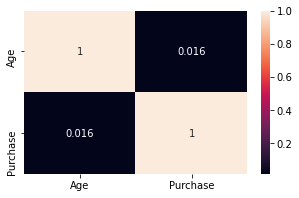

In [ ]:
numerical = sale_df1[['Age','Purchase']]
corr = numerical.corr()
plt.figure(figsize=(5,3))
sns.heatmap(corr, annot=True)

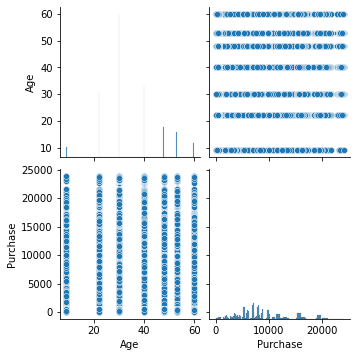

In [ ]:
sns.pairplot(numerical)

###OLS

####OLS on Numeric

In [ ]:
#OLS
#col_1 = ['Gender', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']
drop_cols_1 = ['User_ID', 'Product_ID', 'Purchase']

X = sale_df1.drop(columns = drop_cols_1)
Y = sale_df1[['Purchase']]

df1 = sale_df1
formula_str="Y~X"
result = sm.ols(formula=formula_str,data=df1).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                 1.097e+04
Date:                Thu, 15 Apr 2021   Prob (F-statistic):               0.00
Time:                        10:56:50   Log-Likelihood:            -5.4227e+06
No. Observations:              550068   AIC:                         1.085e+07
Df Residuals:                  550058   BIC:                         1.085e+07
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9331.7459     28.581    326.506      0.0

####OLS Attribute Removed 

AIC and BIC remain same after removal of attributes with no significant (p-value>0.05).

In [ ]:
#OLS
drop_cols_1 = ['User_ID', 'Product_ID', 'Stay_In_Current_City_Years', 'Purchase']

X = sale_df1.drop(columns = drop_cols_1)
Y = sale_df1[['Purchase']]

df1 = sale_df1
formula_str="Y~X"
result = sm.ols(formula=formula_str,data=df1).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                 1.234e+04
Date:                Thu, 15 Apr 2021   Prob (F-statistic):               0.00
Time:                        10:56:51   Log-Likelihood:            -5.4227e+06
No. Observations:              550068   AIC:                         1.085e+07
Df Residuals:                  550059   BIC:                         1.085e+07
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9346.8639     27.238    343.161      0.0

In [ ]:
#OLS
drop_cols_1 = ['User_ID', 'Product_ID', 'Gender', 'Occupation', 'City_Category','Stay_In_Current_City_Years', 'Purchase']

X = sale_df1.drop(columns = drop_cols_1)
Y = sale_df1[['Purchase']]

df1 = sale_df1
formula_str="Y~X"
result = sm.ols(formula=formula_str,data=df1).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                 1.913e+04
Date:                Thu, 15 Apr 2021   Prob (F-statistic):               0.00
Time:                        10:56:51   Log-Likelihood:            -5.4240e+06
No. Observations:              550068   AIC:                         1.085e+07
Df Residuals:                  550062   BIC:                         1.085e+07
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9991.6018     23.631    422.817      0.0

####Dummy Generated

In [ ]:
#Generating Dummies Values
col_1 = ['Gender', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']
drop_cols_1 = ['User_ID', 'Product_ID', 'Purchase']

Y = sale_df1[['Purchase']]
X1 = pd.get_dummies(sale_df1, columns=col_1)
dummy_X = X1.drop(columns = drop_cols_1)
dummy_X.head(2)

,Age,Gender_0,Gender_1,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,Occupation_8,Occupation_9,Occupation_10,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20,City_Category_0,City_Category_1,City_Category_2,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4,Marital_Status_0,Marital_Status_1,Product_Category_1_1,Product_Category_1_2,Product_Category_1_3,Product_Category_1_4,Product_Category_1_5,Product_Category_1_6,...,Product_Category_1_15,Product_Category_1_16,Product_Category_1_17,Product_Category_1_18,Product_Category_1_19,Product_Category_1_20,Product_Category_2_0.0,Product_Category_2_2.0,Product_Category_2_3.0,Product_Category_2_4.0,Product_Category_2_5.0,Product_Category_2_6.0,Product_Category_2_7.0,Product_Category_2_8.0,Product_Category_2_9.0,Product_Category_2_10.0,Product_Category_2_11.0,Product_Category_2_12.0,Product_Category_2_13.0,Product_Category_2_14.0,Product_Category_2_15.0,Product_Category_2_16.0,Product_Category_2_17.0,Product_Category_2_18.0,Product_Category_3_0.0,Product_Category_3_3.0,Product_Category_3_4.0,Product_Category_3_5.0,Product_Category_3_6.0,Product_Category_3_8.0,Product_Category_3_9.0,Product_Category_3_10.0,Product_Category_3_11.0,Product_Category_3_12.0,Product_Category_3_13.0,Product_Category_3_14.0,Product_Category_3_15.0,Product_Category_3_16.0,Product_Category_3_17.0,Product_Category_3_18.0
0,9,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


####OLS Dummy

In [ ]:
#OLS
X = dummy_X
Y = sale_df1[['Purchase']]

df1 = sale_df1
formula_str="Y~X"
result = sm.ols(formula=formula_str,data=df1).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                 1.264e+04
Date:                Thu, 15 Apr 2021   Prob (F-statistic):               0.00
Time:                        10:57:08   Log-Likelihood:            -5.1811e+06
No. Observations:              550068   AIC:                         1.036e+07
Df Residuals:                  549987   BIC:                         1.036e+07
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3195.7618      9.978    320.269      0.0

####OLS Attribute Removed 

In [ ]:
#OLS
drop_cols_1 = ['Occupation_1', 'Occupation_18', 'Occupation_20']

X = dummy_X.drop(columns = drop_cols_1)
Y = sale_df1[['Purchase']]

df1 = sale_df1
formula_str="Y~X"
result = sm.ols(formula=formula_str,data=df1).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                 1.297e+04
Date:                Thu, 15 Apr 2021   Prob (F-statistic):               0.00
Time:                        10:57:23   Log-Likelihood:            -5.1811e+06
No. Observations:              550068   AIC:                         1.036e+07
Df Residuals:                  549989   BIC:                         1.036e+07
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3198.5738     10.642    300.559      0.0

AIC and BIC remain same after removal of attributes with no significant (p-value>0.05).

###Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
import xgboost as xg
from scipy.stats import skew, kurtosis
import statsmodels.formula.api as sm
import math

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dummy_X, Y, test_size=0.7)

####LR

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print(metrics.mean_absolute_error(y_test, y_pred), metrics.r2_score(y_test, y_pred))
print(math.sqrt(metrics.mean_squared_error(y_test, y_pred)))
err = np.array(y_pred) - np.array(y_test)
print(skew(err), kurtosis(err))

2248.7885917794665 0.6480475768265503
2978.1691893034113
[0.6321933] [1.21799821]


####DT

In [ ]:
from sklearn.tree import DecisionTreeRegressor 
import math 
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print(metrics.mean_absolute_error(y_test, y_pred),metrics.r2_score(y_test, y_pred))
print(math.sqrt(metrics.mean_squared_error(y_test, y_pred)))
err = np.array(y_pred) - np.array(y_test)
print(skew(err), kurtosis(err))

2500.9908201778003 0.4958206042880783
3567.1978518504425


##**2.3. Missing value Handled with Prob Distribution**

In [ ]:
#Handling Missing Values 3
sale_df3 = pd.read_csv('train.csv')
prods = sale_df3['Product_Category_2'].value_counts().index.tolist()
probs = sale_df3['Product_Category_2'].value_counts().tolist()
probs = [p /376430  for p in probs ]    
fill_missing = np.random.choice(prods, p = probs, size = len(sale_df3))
sale_df3['Product_Category_2'].fillna(pd.Series(fill_missing), inplace=True)
sale_df3.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8.0,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


###Chi-Sq

In [ ]:
# CHI SQUARE TEST 3
from scipy.stats import chi2_contingency
c = sale_df3.columns
categorical_cols = [c[2],c[4],c[5],c[6],c[7],c[8],c[9]]
for i in list(range(0,3)):
    for j in list(range(0,6)) :
        cont = pd.crosstab(sale_df3[categorical_cols[i]], sale_df3[categorical_cols[j]])
        c, p, dof, expected = chi2_contingency(cont)
        print(categorical_cols[i] + "  ", categorical_cols[j])
        print(p)

Gender   Gender
0.0
Gender   Occupation
0.0
Gender   City_Category
5.097590042852447e-08
Gender   Stay_In_Current_City_Years
2.4239419818989305e-190
Gender   Marital_Status
7.80091894540745e-18
Gender   Product_Category_1
0.0
Occupation   Gender
0.0
Occupation   Occupation
0.0
Occupation   City_Category
0.0
Occupation   Stay_In_Current_City_Years
0.0
Occupation   Marital_Status
0.0
Occupation   Product_Category_1
0.0
City_Category   Gender
5.097590042852447e-08
City_Category   Occupation
0.0
City_Category   City_Category
0.0
City_Category   Stay_In_Current_City_Years
0.0
City_Category   Marital_Status
7.649061125706496e-190
City_Category   Product_Category_1
0.0


###Age

In [ ]:
ages = sale_df3['Age'].unique()
Age_number = {ages[2] : 30, ages[5]:40, ages[3] : 48, ages[4] : 53, ages[1] : 60, ages[0] : 9, ages[6] : 22}
sale_df3 = sale_df3.replace({'Age':Age_number})
sale_df3['Age'].unique()
sale_df3.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,9,10,A,2,0,3,8.0,NaN,8370
1,1000001,P00248942,F,9,10,A,2,0,1,6.0,14.0,15200


###Dummy Generated

In [ ]:
#Generating Dummy Values
col_2 = ['Gender','Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',  'Product_Category_2']
drop_cols_2 = ['User_ID', 'Product_ID',  'Product_Category_3', 'Purchase']
X2 = pd.get_dummies(sale_df3, columns=col_2)
dummy_X3 = X2.drop(columns = drop_cols_2)
dummy_X3.head(2)

,Age,Gender_F,Gender_M,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,Occupation_8,Occupation_9,Occupation_10,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Marital_Status_0,Marital_Status_1,Product_Category_1_1,Product_Category_1_2,Product_Category_1_3,Product_Category_1_4,Product_Category_1_5,Product_Category_1_6,Product_Category_1_7,Product_Category_1_8,Product_Category_1_9,Product_Category_1_10,Product_Category_1_11,Product_Category_1_12,Product_Category_1_13,Product_Category_1_14,Product_Category_1_15,Product_Category_1_16,Product_Category_1_17,Product_Category_1_18,Product_Category_1_19,Product_Category_1_20,Product_Category_2_2.0,Product_Category_2_3.0,Product_Category_2_4.0,Product_Category_2_5.0,Product_Category_2_6.0,Product_Category_2_7.0,Product_Category_2_8.0,Product_Category_2_9.0,Product_Category_2_10.0,Product_Category_2_11.0,Product_Category_2_12.0,Product_Category_2_13.0,Product_Category_2_14.0,Product_Category_2_15.0,Product_Category_2_16.0,Product_Category_2_17.0,Product_Category_2_18.0
0,9,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,9,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


###OLS

In [ ]:
dummy_X3.info()

####OLS Dummy

In [ ]:
#OLS
X = dummy_X3
Y = sale_df3[['Purchase']]

df1 = sale_df3
formula_str="Y~X"
result = sm.ols(formula=formula_str,data=df1).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                 1.538e+04
Date:                Thu, 15 Apr 2021   Prob (F-statistic):               0.00
Time:                        10:22:12   Log-Likelihood:            -5.1859e+06
No. Observations:              550068   AIC:                         1.037e+07
Df Residuals:                  550003   BIC:                         1.037e+07
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3251.1091      8.691    374.085      0.0

####OLS Attribute Removed

In [ ]:
#OLS
drop_cols_1 = ['Occupation_18', 'Occupation_20']

X = dummy_X3.drop(columns = drop_cols_1)
Y = sale_df3[['Purchase']]

df1 = sale_df3
formula_str="Y~X"
result = sm.ols(formula=formula_str,data=df1).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                 1.563e+04
Date:                Thu, 15 Apr 2021   Prob (F-statistic):               0.00
Time:                        10:35:01   Log-Likelihood:            -5.1859e+06
No. Observations:              550068   AIC:                         1.037e+07
Df Residuals:                  550004   BIC:                         1.037e+07
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3250.0531     10.224    317.885      0.0

In [ ]:
#OLS
drop_cols_1 = ['Age', 'Gender_F', 'Gender_M', 'Occupation_1', 'Occupation_18', 'Occupation_20']

X = dummy_X3.drop(columns = drop_cols_1)
Y = sale_df3[['Purchase']]

df1 = sale_df3
formula_str="Y~X"
result = sm.ols(formula=formula_str,data=df1).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                 1.638e+04
Date:                Thu, 15 Apr 2021   Prob (F-statistic):               0.00
Time:                        10:54:18   Log-Likelihood:            -5.1862e+06
No. Observations:              550068   AIC:                         1.037e+07
Df Residuals:                  550007   BIC:                         1.037e+07
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.405e+14   4.24e+14     -0.803      0.4

AIC and BIC remain same after removal of attributes with no significant (p-value>0.05).

#**3. Model Implementation**

##**3.1. Linear Regression**

In [ ]:
Y = sale_df['Purchase']
c = ['Product_Category_1','Product_Category_2']
regressor = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.7)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
mape = np.mean(np.abs((y_test - y_pred) / np.abs(y_test)))
print('R Squared Error (R2):', metrics.r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 2276.1572018293823
Root Mean Squared Error (RMSE): 3008.266862449945
R Squared Error (R2): 0.6406066529037617


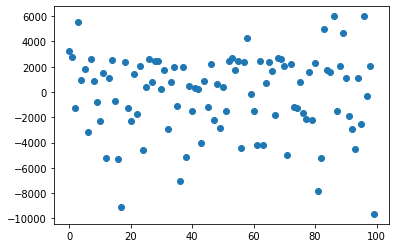

In [ ]:
er = np.array(y_test) - np.array(y_pred)
plt.scatter(range(0,100),er[1000:1100])
plt.show()

## **3.2. XGBoost** 

In [ ]:
import xgboost as xg
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
xgb_r.fit(X_train, y_train)
y_pred = xgb_r.predict(X_test)
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
mape = np.mean(np.abs((y_test - y_pred) / np.abs(y_test)))
print('R Squared Error (R2):', metrics.r2_score(y_test, y_pred))

[09:45:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Absolute Error (MAE): 4031.0926773874316
Mean Squared Error (MSE): 25777672.129714794
Root Mean Squared Error (RMSE): 5077.171666362562
R Squared Error (R2): -0.02371957903660915


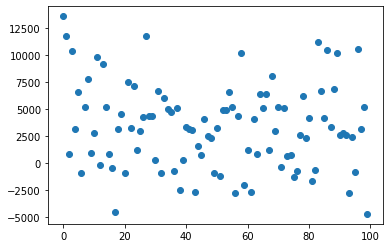

In [ ]:
er = np.array(y_test) - np.array(y_pred)
plt.scatter(range(0,100),er[1000:1100])
plt.show()

##**3.3. Decision Tree Regression**

In [ ]:
from sklearn.tree import DecisionTreeRegressor  
x = sale_df[cols]
regressor = DecisionTreeRegressor()  
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.7)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
mape = np.mean(np.abs((y_test - y_pred) / np.abs(y_test)))
print('R Squared Error (R2):', metrics.r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 2454.79880847346
Mean Squared Error (MSE): 11775276.488729639
Root Mean Squared Error (RMSE): 3431.512274308463
R Squared Error (R2): 0.5334091893860775


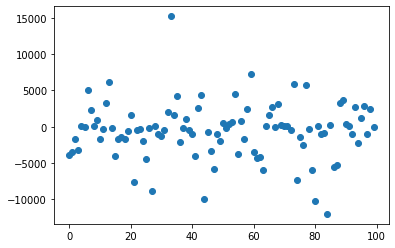

In [ ]:
er = np.array(y_test) - np.array(y_pred)
plt.scatter(range(0,100),er[1000:1100])
plt.show()

##**3.4. Random Forest Regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor 
regressor = RandomForestRegressor(n_estimators = 20, random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.7)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
mape = np.mean(np.abs((y_test - y_pred) / np.abs(y_test)))
print('R Squared Error (R2):', metrics.r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 2299.946350016099
Mean Squared Error (MSE): 9849615.84809566
Root Mean Squared Error (RMSE): 3138.4097642111137
R Squared Error (R2): 0.6102322861713818


##**3.5. Lasso Regression**

In [ ]:
from sklearn import linear_model
import math
from scipy.stats import skew, kurtosis
regressor = linear_model.Lasso(alpha=0.2,max_iter = 5000)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print(metrics.mean_absolute_error(y_test, y_pred), metrics.r2_score(y_test, y_pred))
print(math.sqrt(metrics.mean_squared_error(y_test, y_pred)))
err = np.array(y_pred) - np.array(y_test)
print(skew(err), kurtosis(err))

2275.624387727296 0.6421119288945629
3007.324739068432
0.6202736033106632 1.1859768744420434


##**3.6. Ridge Regression**

In [ ]:
regressor = linear_model.Ridge(alpha=1, tol = 0.0005)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print(metrics.mean_absolute_error(y_test, y_pred), metrics.r2_score(y_test, y_pred))
print(math.sqrt(metrics.mean_squared_error(y_test, y_pred)))
err = np.array(y_pred) - np.array(y_test)
print(skew(err), kurtosis(err))

2275.544965812042 0.6421105598885073
3007.330490925192
0.6227893921644335 1.1886143534548603


##**3.7. Elastic Net Regression**

In [ ]:
regressor = linear_model.ElasticNet(alpha=0.01)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print(metrics.mean_absolute_error(y_test, y_pred), metrics.r2_score(y_test, y_pred))
print(math.sqrt(metrics.mean_squared_error(y_test, y_pred)))
err = np.array(y_pred) - np.array(y_test)
print(skew(err), kurtosis(err))

2427.2483337339618 0.6115930707725838
3132.9264550617404
0.2837331333987208 0.7034581618185527


In [ ]:
er = np.array(y_test) - np.array(y_pred)
plt.scatter(range(0,100),er[1000:1100])
plt.show()

In [ ]:
check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
check

In [ ]:
P_LR_MAE = metrics.mean_absolute_error(y_test, y_pred)
print('DT Mean Absolute Error:', P_LR_MAE)
P_LR_R2 = metrics.r2_score(y_test, y_pred)
print('DT R Square:', P_LR_R2)